In [2]:
%matplotlib inline
import cv2
import os
from sklearn.decomposition import PCA
import numpy as np
from IPython.display import clear_output, Image, display
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
import matplotlib.pyplot as plt 

In [3]:
train_folder = '../CUHK/photo_train/'
train_dirs = os.listdir(train_folder)
train_dirs = [os.path.join(train_folder, train_dir) for train_dir in train_dirs]
len(train_dirs)

100

In [4]:
(left, upper, right, lower) = (128, 0, 896, 768)
MAX_SIZE= (128, 128)

In [5]:
arrays = []
images = []
for dir in train_dirs:
    img = Image.open(dir).convert('L')
    img_crop = img.crop((left, upper, right, lower))
    img_crop.thumbnail(MAX_SIZE)
    images.append(img_crop)
    array = np.asarray(img_crop).reshape(16384)
    arrays.append(array)
len(array)

16384

In [6]:
arrays[0].shape

(16384,)

In [7]:
# PCA
n_components = 80
pca = PCA(n_components=n_components, whiten=True).fit(arrays)

In [8]:
train_set = pca.transform(arrays)

In [9]:
train_set.shape

(100, 80)

In [10]:
test_folder = '../CUHK/photo_test/' 
test_dirs = os.listdir(test_folder)
test_dirs = [os.path.join(test_folder, test_dir) for test_dir in test_dirs]


In [11]:
test_img = Image.open(test_dirs[10]).convert('L')
test_img_crop = test_img.crop((left, upper, right, lower))
test_img_crop.thumbnail(MAX_SIZE)
test_img_crop.show()
test_array = np.asarray(test_img_crop).reshape(16384)
test_pca = pca.transform([test_array])
test_pca.shape

(1, 80)

In [12]:
train_set[1].shape

(80,)

In [13]:
results = cosine_similarity(train_set, test_pca)\

In [14]:
indexs = results.T.argsort()
best_results = indexs[0][-5:]

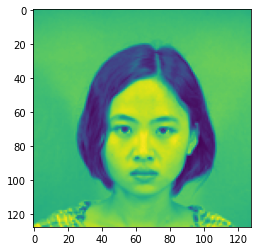

In [15]:
plt.imshow(test_img_crop)


Các hình giống với hình ở trên nhất


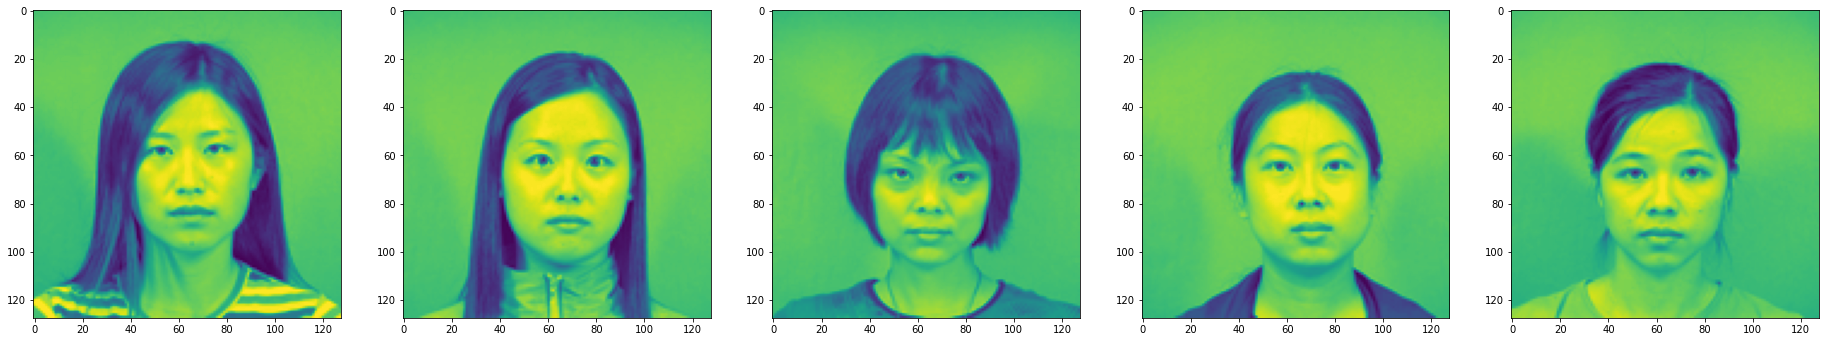

In [16]:
def show_image(array,figure, best):
    for i in range(len(best)):
        pixels = array[i]
        img = pixels.reshape((128, 128))
        figure.add_subplot(1, 5, i+1)
        plt.imshow(img)
        i += 1
    plt.show()
print("Các hình giống với hình ở trên nhất")
fig1 = plt.figure(figsize=(32, 32))
show_image(arrays, fig1, best_results)